# World_bank_analysis


> The following is an example of on how to use and distribute your project as a [Python package](https://packaging.python.org) using the example <span style="color:#3EACAD">template</span>. Remember mix and match to yout project's requirements. 

## Usage

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')

In [12]:
import sys
import os

# Add ../src relative to the notebook location
src_path = os.path.abspath("../src")
if src_path not in sys.path:
    sys.path.insert(0, src_path)


Unlike the [previous example](https://worldbank.github.io/template/notebooks/world-bank-api.html), where the source code was contained on the Jupyter notebook itself, we (re)use a Python package - the [template](https://github.com/worldbank/template/tree/main/src/template) Python package - which will let us (re)use any attributes and methods in the following example.

Let's start by importing `WorldBankIndicatorsAPI`, a Python API wrapper class created to facilitate the usage of the [World Bank Indicators API](https://datahelpdesk.worldbank.org/knowledgebase/articles/889392-about-the-indicators-api-documentation).

In [13]:
import importlib
import template.data_preprocessing
#Reload the module to reflect any changes made
importlib.reload(template.data_preprocessing)
from template.data_preprocessing import load_data,explore_data

update with save data path : 


In [14]:
#load the data
df = load_data('WB.xlsx',file_type='excel',sheet_name='CC GOV Global Indicatos 2024')
# %%
#explore the data
explore_data(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Key                 2184 non-null   object 
 1   Country             2184 non-null   object 
 2   Region              2160 non-null   object 
 3   Income              2184 non-null   object 
 4   Indicator           2184 non-null   object 
 5   Indicator type      2184 non-null   object 
 6   Indicator key word  2184 non-null   object 
 7   Score               2184 non-null   object 
 8   Evidence            1895 non-null   object 
 9   Link                1326 non-null   object 
 10  Numerical score     2184 non-null   float64
 11  Comments            22 non-null     object 
dtypes: float64(1), object(11)
memory usage: 204.9+ KB
Dataset Info:
 None

First 5 Rows:
                                                  Key      Country Region  \
0  Afghanistan-Is there a mechanism to c

In [15]:
# import pandas as pd

# # Base columns to keep
# base_cols = ['Country', 'Indicator']

# # Create null flags
# df['Region_Null'] = df['Region'].isnull()
# df['Evidence_Null'] = df['Evidence'].isnull()
# df['Link_Null'] = df['Link'].isnull()
# df['Comments_Null'] = df['Comments'].isnull()

# # Subset the relevant columns for Tableau
# tableau_df = df[base_cols + ['Region_Null', 'Evidence_Null', 'Link_Null', 'Comments_Null']]

# # Optional: Remove duplicates (some combinations might repeat due to multiple entries)
# tableau_df = tableau_df.drop_duplicates()

# # Save to CSV for Tableau
# tableau_df.to_csv('tableau_null_indicator_map.csv', index=False)
# #need to open tableau link and check the data

In [16]:
null_region_countries = f"The counrties with the missing values in the Region column are:{df[df['Region'].isnull()]['Country'].unique()}"
print(null_region_countries)
null_evidence_countries =f"""The total no of countries with missing evedence are :{len(df[df["Evidence"].isnull()]["Country"].unique())} 
and the conutry names are {df[df["Evidence"].isnull()]["Country"].unique()}"""
print(null_evidence_countries)

The counrties with the missing values in the Region column are:['Canada' 'United States']
The total no of countries with missing evedence are :146 
and the conutry names are ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Arab Republic of Egypt' 'Armenia' 'Azerbaijan' 'Bahrain' 'Bangladesh'
 'Belarus' 'Belize' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'China'
 'Comoros' 'Costa Rica' 'Cote d’Ivoire' 'Croatia' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea" 'Democratic Republic of Congo'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'El Salvador'
 'Equatorial Guinea\xa0' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Federated States of Micronesia' 'Gabon' 'Georgia' 'Ghana' 'Greece'
 'Grenada' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iraq' 'Islamic Republic of Ir

In [17]:
null_linked_countries = f"""The total no of countries with missing linked data are :{len(df[df["Link"].isnull()]["Country"].unique())}
and the conutry names are {df[df["Link"].isnull()]["Country"].unique()}"""
print(null_linked_countries)



The total no of countries with missing linked data are :179
and the conutry names are ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Arab Republic of Egypt' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile'
 'China' 'Colombia' 'Comoros' 'Costa Rica' 'Cote d’Ivoire' 'Croatia'
 'Cyprus' 'Czechia' "Democratic People's Republic of Korea"
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'El Salvador' 'Equatorial Guinea\xa0'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Federated States of Micronesia' 'Fiji' 'Finland' 'France' 'Gabon'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungar

In [18]:
region_mapping = {
    'SAR': 'South Asia Region',
    'ECA': 'Europe and Central Asia',
    'MNA': 'Middle East and North Africa',
    'AFRE': 'Sub-Saharan Africa (East)',
    'LAC': 'Latin America and the Caribbean',
    'EAP': 'East Asia and Pacific',
    'AFRW': 'Sub-Saharan Africa (West)'
}

# Map the region codes to region names and create a new column
df['Region_names'] = df['Region'].map(region_mapping)
df.head()
#%%
# Insert the Region_names column next to Region_codes
region_col_index = df.columns.get_loc('Region')  # Get the index of the Region_codes column
df.insert(region_col_index + 1, 'Region_names', df.pop('Region_names'))
df.head()
#%%
country_scores = df.groupby('Country').agg(Numerical_score=('Numerical score', 'mean')).reset_index()
#%%
print(country_scores.head(10))

                  Country  Numerical_score
0             Afghanistan         0.083333
1                 Albania         0.416667
2                 Algeria         0.208333
3                  Angola         0.291667
4     Antigua and Barbuda         0.333333
5  Arab Republic of Egypt         0.458333
6               Argentina         0.750000
7                 Armenia         0.375000
8               Australia         0.791667
9                 Austria         1.000000


In [19]:
#%%
# Creating aggregated metrics per country
country_summary = df.groupby("Country").agg(
    Total_Indicators=("Score", "count"),
    Yes_Count=("Score", lambda x: (x == "Yes").sum()),
    Partial_Count=("Score", lambda x: (x == "Partial").sum()),
    No_Count=("Score", lambda x: (x == "No").sum()),
    Info_Not_Found_Count=("Score", lambda x: (x == "Info not found").sum()),
    Avg_Score=("Numerical score", "mean")
).reset_index()
#%%


In [20]:
#%%
import plotly.express as px

# Create the choropleth map
fig = px.choropleth(
    country_summary,
    locations="Country",
    locationmode="country names",  # Match on country names
    color="Avg_Score",  # The metric to color by
    hover_name="Country",
    hover_data={
        "Total_Indicators": True,
        "Yes_Count": True,
        "Partial_Count": True,
        "No_Count": True,
        "Info_Not_Found_Count": True,
        "Avg_Score": True
    },
    color_continuous_scale="Viridis",
    title="Average Score by Country"
)

fig.update_geos(projection_type="natural earth")
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()


C:\Users\goura\AppData\Local\Temp\ipykernel_13828\3767043247.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




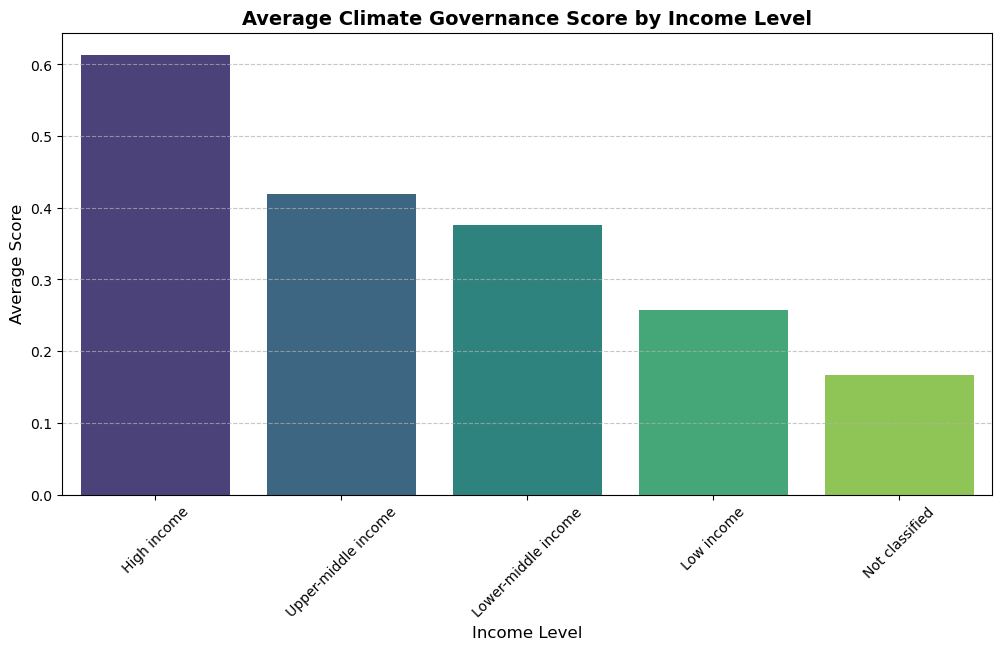

In [21]:

# Computing income-level averages
income_summary = df.groupby("Income").agg(
    Avg_Score=("Numerical score", "mean"),
    Total_Countries=("Country", "nunique"),
    Total_Indicators=("Score", "count")
).reset_index()

#%%
# Visualization: Barplot for Income Level
plt.figure(figsize=(12, 6))
income_summary_sorted = income_summary.sort_values(by='Avg_Score', ascending=False)  # Sort in descending order
sns.barplot(x='Income', y='Avg_Score', data=income_summary_sorted, palette='viridis')
plt.xlabel("Income Level", fontsize=12)
plt.ylabel("Average Score", fontsize=12)
plt.title("Average Climate Governance Score by Income Level", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
#%%


In [22]:
statemnet = f"The country for which the dataset has income column as Not Classified is : {df[df['Income']=='Not classified']['Country'].unique()}"
print(statemnet)


The country for which the dataset has income column as Not Classified is : ['Republica Bolivariana de Venezuela']


#World Bank data second sheet

In [23]:
# Accessing the 'Visualization' sheet

importlib.reload(template.data_preprocessing)

df_visualization = load_data('WB.xlsx',file_type='excel',sheet_name='Visualization')

update with save data path : 


In [24]:
# Select the first 14 columns
df_visualization_filtered = df_visualization.iloc[:, :14]
# Set the first row as column headers
df_visualization_filtered.columns = df_visualization_filtered.iloc[0]
df_visualization_filtered.head()


,Region,Country,Framework Law,Long-term Strategy (LTS) or 2050+ CC Plan,National Adaptation Plan (NAP),Coordination Mechanism,Local-Level Risk Assessments,Fiscal Risk Statements,Budget Guidelines,CC in Budget,Project Screening,SOE TFCD Framework Compliance,Subnational Government CC Plans and Strategies \n,Environmental Criteria in Procurement Tenders
0,Region,Country,Framework Law,Long-term Strategy (LTS) or 2050+ CC Plan,National Adaptation Plan (NAP),Coordination Mechanism,Local-Level Risk Assessments,Fiscal Risk Statements,Budget Guidelines,CC in Budget,Project Screening,SOE TFCD Framework Compliance,Subnational Government CC Plans and Strategies \n,Environmental Criteria in Procurement Tenders
1,SAR,Afghanistan,No,No,No,Yes,Info not found,Info not found,Info not found,No,No,No,No,No
2,ECA,Albania,Yes,No,Yes,Yes,Yes,Info not found,No,No,No,No,Partial,Partial
3,MNA,Algeria,No,No,No,Yes,Yes,Info not found,No,No,No,No,No,Partial
4,AFRE,Angola,No,No,No,Yes,No,Yes,Yes,No,No,No,No,Partial


In [25]:
# Drop the first row (which is now the header)
df_visualization_filtered = df_visualization_filtered[1:].reset_index(drop=True)
df_visualization_filtered.head()

,Region,Country,Framework Law,Long-term Strategy (LTS) or 2050+ CC Plan,National Adaptation Plan (NAP),Coordination Mechanism,Local-Level Risk Assessments,Fiscal Risk Statements,Budget Guidelines,CC in Budget,Project Screening,SOE TFCD Framework Compliance,Subnational Government CC Plans and Strategies \n,Environmental Criteria in Procurement Tenders
0,SAR,Afghanistan,No,No,No,Yes,Info not found,Info not found,Info not found,No,No,No,No,No
1,ECA,Albania,Yes,No,Yes,Yes,Yes,Info not found,No,No,No,No,Partial,Partial
2,MNA,Algeria,No,No,No,Yes,Yes,Info not found,No,No,No,No,No,Partial
3,AFRE,Angola,No,No,No,Yes,No,Yes,Yes,No,No,No,No,Partial
4,LAC,Antigua and Barbuda,No,No,No,Yes,Partial,Yes,Yes,No,No,No,No,Partial


In [26]:
df_check = df.copy(deep=True)
#%%
explore_data(df_check)
#%%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Key                 2184 non-null   object 
 1   Country             2184 non-null   object 
 2   Region              2160 non-null   object 
 3   Region_names        2160 non-null   object 
 4   Income              2184 non-null   object 
 5   Indicator           2184 non-null   object 
 6   Indicator type      2184 non-null   object 
 7   Indicator key word  2184 non-null   object 
 8   Score               2184 non-null   object 
 9   Evidence            1895 non-null   object 
 10  Link                1326 non-null   object 
 11  Numerical score     2184 non-null   float64
 12  Comments            22 non-null     object 
dtypes: float64(1), object(12)
memory usage: 221.9+ KB
Dataset Info:
 None

First 5 Rows:
                                                  Key      Country R

#Checking missing regions in sheet two to verfy if its same as sheet 1


In [27]:
null_df_visualisation = df_visualization_filtered[df_visualization_filtered['Region'].isna()]
null_df_visualisation

,Region,Country,Framework Law,Long-term Strategy (LTS) or 2050+ CC Plan,National Adaptation Plan (NAP),Coordination Mechanism,Local-Level Risk Assessments,Fiscal Risk Statements,Budget Guidelines,CC in Budget,Project Screening,SOE TFCD Framework Compliance,Subnational Government CC Plans and Strategies \n,Environmental Criteria in Procurement Tenders
29,NaN,Canada,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes
174,NaN,United States,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes


In [28]:
# # Get the directory where the current script is located

import template.data_preprocessing
importlib.reload(template.data_preprocessing)
from template.data_preprocessing import save_data

update with save data path : 


In [29]:
# save_data(df_visualization_filtered, 'WB_wide_format.csv')

In [30]:
# save_data(df_check,'WB_long_format.csv')


# This creates a dictionary where keys are values from the "Indicator" column, and values are from "Indicator key word".The dictionary will be used to map indicators to their respective keywords.

In [31]:
mapping_dict = dict(zip(df_check['Indicator'], df_check['Indicator key word']))
mapping_dict

{'Is there a mechanism to coordinate among national government agencies on climate strategy and policy?': 'Coordination',
 'Does the national government (or other body) publish climate risk information covering all local government units?': 'Climate risk information',
 'Do fiscal risk statements identify climate change-related risks?': 'Fiscal risk statement',
 'Is climate change reflected in the budget guidelines?': 'Budget guidelines',
 'Are climate-related expenditures identified in the budget and/or tracked?': 'Budget tracking',
 'Are national public investment projects screened for climate policy alignment, climate impacts and climate-related risks?': 'Public investment screening',
 'Does the Government require SOEs (even if the largest only) to comply with the elements of the TFCD framework (disclosure of Climate Governance, Strategy, Risk, Metrics)?': 'SOE TCFD disclosure',
 'Have subnational governments prepared and published a) CC physical risk assessments and b) CC strategies

In [32]:

df_check['Mapped_indicators'] = df_check['Indicator'].map(mapping_dict)
df_check[['Country','Indicator','Mapped_indicators']].head(5)

,Country,Indicator,Mapped_indicators
0,Afghanistan,Is there a mechanism to coordinate among natio...,Coordination
1,Afghanistan,Does the national government (or other body) p...,Climate risk information
2,Afghanistan,Do fiscal risk statements identify climate cha...,Fiscal risk statement
3,Afghanistan,Is climate change reflected in the budget guid...,Budget guidelines
4,Afghanistan,Are climate-related expenditures identified in...,Budget tracking


In [33]:
load_data('long_to_wide_mapping.csv',file_type='csv')

,Long Format Indicator,Wide Format Indicator,Explanation
0,Coordination,Coordination Mechanism,Ensures cross-sectoral coordination for climat...
1,Climate risk information,Local-Level Risk Assessments,Provides assessments of local climate risks to...
2,Fiscal risk statement,Fiscal Risk Statements,Identifies climate-related risks for long-term...
3,Budget guidelines,Budget Guidelines,Ensures budgetary frameworks integrate climate...
4,Budget tracking,CC in Budget,Tracks and prioritizes climate-related expendi...
5,Public investment screening,Project Screening,Ensures public projects align with national cl...
6,SOE TCFD disclosure,SOE TFCD Framework Compliance,Ensures SOEs disclose climate-related financia...
7,Subnational government,Subnational Government CC Plans and Strategies,Supports local governments in formulating clim...
8,CC law,Framework Law,Establishes the foundational legal framework f...
9,NAP,National Adaptation Plan (NAP),Defines adaptation policies to mitigate climat...


## Data Sanity Check betweenb two sheets of world bank data

As before, let's now plot the data as a time series using [Bokeh](https://docs.bokeh.org).

In [34]:
import template.data_sanity_check as dsc
importlib.reload(template.data_sanity_check)

updated 
updated 


<module 'template.data_sanity_check' from 'c:\\Users\\goura\\Documents\\world_banK\\World_bank_project_42\\src\\template\\data_sanity_check.py'>

In [35]:
df_check = load_data("WB_long_format.csv",file_type='csv')  
df_visualization_filtered = load_data("WB_wide_format.csv") 
mapped_indicators = load_data("long_to_wide_mapping.csv")

# Step 1: Pivot df_visualization_filtered to long format
df_visualization_filtered_long_df = df_visualization_filtered.melt(
    id_vars=["Country", "Region"],
    var_name="Indicator_value",
    value_name="Score"
)

# Step 2: Ensure country order matches df_check
df_visualization_filtered_long_df = dsc.set_categorical_order(
    df_visualization_filtered_long_df,
    column="Country",
    categories=df_check["Country"].unique(),
    sort_columns=["Country"]
)

# Step 3: Clean indicator columns for matching
df_visualization_filtered_long_df_safety = df_visualization_filtered_long_df.copy()
mapped_indicators = dsc.clean_columns(mapped_indicators, "Wide Format Indicator", "Cleaned_Wide_Format")
df_visualization_filtered_long_df_safety = dsc.clean_columns(
    df_visualization_filtered_long_df_safety, "Indicator_value", "Cleaned_Indicator_Value"
)

# Step 4: Check if indicator values match
match, unmatched = dsc.check_indicator_match(
    mapped_indicators, "Cleaned_Wide_Format",
    df_visualization_filtered_long_df_safety, "Cleaned_Indicator_Value"
)
if match:
    print("All indicator values match.")
else:
    print("Unmatched indicator values:", unmatched)

# Step 5: Set categorical order for indicators
df_visualization_filtered_long_df_safety = dsc.set_categorical_order(
    df_visualization_filtered_long_df_safety,
    column="Cleaned_Indicator_Value",
    categories=mapped_indicators["Cleaned_Wide_Format"].tolist(),
    sort_columns=["Country", "Cleaned_Indicator_Value", "Indicator_value"]
)


All indicator values match.


In [36]:
df_visualization_filtered_long_df_safety.reset_index(drop=True, inplace=True)
df_visualization_filtered_long_df_safety.head(24)


,Country,Region,Indicator_value,Score,Cleaned_Indicator_Value
0,Afghanistan,SAR,Coordination Mechanism,Yes,coordination mechanism
1,Afghanistan,SAR,Local-Level Risk Assessments,Info not found,local-level risk assessments
2,Afghanistan,SAR,Fiscal Risk Statements,Info not found,fiscal risk statements
3,Afghanistan,SAR,Budget Guidelines,Info not found,budget guidelines
4,Afghanistan,SAR,CC in Budget,No,cc in budget
5,Afghanistan,SAR,Project Screening,No,project screening
6,Afghanistan,SAR,SOE TFCD Framework Compliance,No,soe tfcd framework compliance
7,Afghanistan,SAR,Subnational Government CC Plans and Strategies \n,No,subnational government cc plans and strategies
8,Afghanistan,SAR,Framework Law,No,framework law
9,Afghanistan,SAR,National Adaptation Plan (NAP),No,national adaptation plan (nap)


In [37]:

# Check the data types of the columns to be merged
print(df_check['Score'].dtype)
print(df_visualization_filtered_long_df_safety['Score'].dtype)
df_check['Country'] = df_check['Country'].astype(str)
df_visualization_filtered_long_df_safety['Country'] = df_visualization_filtered_long_df_safety['Country'].astype(str)

# Compare the 'Country' columns
country_match = df_check['Country'].equals(df_visualization_filtered_long_df_safety['Country'])
print("The 'Country' columns in both DataFrames are in same order.")

# Compare the 'Score' column
score_match = df_check['Score'].equals(df_visualization_filtered_long_df_safety['Score'])
if score_match:
    print("The 'Score' columns in both DataFrames match row by row.")
else:
    print("The 'Score' columns in both DataFrames do not match row by row.")
    unmatched_scores = df_check['Score'] != df_visualization_filtered_long_df_safety['Score']
    print("Rows with mismatched scores:")
    print(df_check[unmatched_scores])
    print(df_visualization_filtered_long_df_safety[unmatched_scores])

object
object
The 'Country' columns in both DataFrames are in same order.
The 'Score' columns in both DataFrames match row by row.


In [38]:
# Step 6: Combine datasets
df_two_sheets_combined = dsc.combine_datasets(df_check, df_visualization_filtered_long_df_safety)

# Step 7: Compare columns (e.g., Region)
match, unmatched = dsc.compare_columns(df_two_sheets_combined, "Region_1", "Region_2")
if match:
    print("Region columns match.")
else:
    print("Unmatched regions:\n", unmatched)

# Step 8: Clean column names
df_two_sheets_combined_copy = df_two_sheets_combined.copy()



Unmatched regions:
                                                   Key_1      Country_1  \
348   Canada-Is there a mechanism to coordinate amon...         Canada   
349   Canada-Does the national government (or other ...         Canada   
350   Canada-Do fiscal risk statements identify clim...         Canada   
351   Canada-Is climate change reflected in the budg...         Canada   
352   Canada-Are climate-related expenditures identi...         Canada   
353   Canada-Are national public investment projects...         Canada   
354   Canada-Does the Government require SOEs (even ...         Canada   
355   Canada-Have subnational governments prepared a...         Canada   
356                 Canada-Climate change framework law         Canada   
357                     Canada-National adaptation plan         Canada   
358                           Canada-Long-term strategy         Canada   
359   Canada-Does the country include environmental ...         Canada   
2088  United State

In [39]:
df_two_sheets_combined_copy.head(5)

,Key_1,Country_1,Region_1,Region_names_1,Income_1,Indicator_1,Indicator type_1,Indicator key word_1,Score_1,Evidence_1,Link_1,Numerical score_1,Comments _1,Country_2,Region_2,Indicator_value_2,Score_2,Cleaned_Indicator_Value_2
0,Afghanistan-Is there a mechanism to coordinate...,Afghanistan,SAR,South Asia Region,Low income,Is there a mechanism to coordinate among natio...,Governance,Coordination,Yes,The National Environmental Protection Agency C...,https://www.nepa.gov.af/service3,1.0,NaN,Afghanistan,SAR,Coordination Mechanism,Yes,coordination mechanism
1,Afghanistan-Does the national government (or o...,Afghanistan,SAR,South Asia Region,Low income,Does the national government (or other body) p...,Governance,Climate risk information,Info not found,No published climate risk data for all local g...,NaN,0.0,NaN,Afghanistan,SAR,Local-Level Risk Assessments,Info not found,local-level risk assessments
2,Afghanistan-Do fiscal risk statements identify...,Afghanistan,SAR,South Asia Region,Low income,Do fiscal risk statements identify climate cha...,Governance,Fiscal risk statement,Info not found,The Taliban has developed a budget but documen...,NaN,0.0,NaN,Afghanistan,SAR,Fiscal Risk Statements,Info not found,fiscal risk statements
3,Afghanistan-Is climate change reflected in the...,Afghanistan,SAR,South Asia Region,Low income,Is climate change reflected in the budget guid...,Governance,Budget guidelines,Info not found,The Taliban has created a budget but documents...,NaN,0.0,NaN,Afghanistan,SAR,Budget Guidelines,Info not found,budget guidelines
4,Afghanistan-Are climate-related expenditures i...,Afghanistan,SAR,South Asia Region,Low income,Are climate-related expenditures identified in...,Governance,Budget tracking,No,The Taliban has developed a budget for Afghani...,https://www.undp.org/sites/g/files/zskgke326/f...,0.0,NaN,Afghanistan,SAR,CC in Budget,No,cc in budget


In [40]:
df_two_sheets_combined_copy

,Key_1,Country_1,Region_1,Region_names_1,Income_1,Indicator_1,Indicator type_1,Indicator key word_1,Score_1,Evidence_1,Link_1,Numerical score_1,Comments _1,Country_2,Region_2,Indicator_value_2,Score_2,Cleaned_Indicator_Value_2
0,Afghanistan-Is there a mechanism to coordinate...,Afghanistan,SAR,South Asia Region,Low income,Is there a mechanism to coordinate among natio...,Governance,Coordination,Yes,The National Environmental Protection Agency C...,https://www.nepa.gov.af/service3,1.0,NaN,Afghanistan,SAR,Coordination Mechanism,Yes,coordination mechanism
1,Afghanistan-Does the national government (or o...,Afghanistan,SAR,South Asia Region,Low income,Does the national government (or other body) p...,Governance,Climate risk information,Info not found,No published climate risk data for all local g...,NaN,0.0,NaN,Afghanistan,SAR,Local-Level Risk Assessments,Info not found,local-level risk assessments
2,Afghanistan-Do fiscal risk statements identify...,Afghanistan,SAR,South Asia Region,Low income,Do fiscal risk statements identify climate cha...,Governance,Fiscal risk statement,Info not found,The Taliban has developed a budget but documen...,NaN,0.0,NaN,Afghanistan,SAR,Fiscal Risk Statements,Info not found,fiscal risk statements
3,Afghanistan-Is climate change reflected in the...,Afghanistan,SAR,South Asia Region,Low income,Is climate change reflected in the budget guid...,Governance,Budget guidelines,Info not found,The Taliban has created a budget but documents...,NaN,0.0,NaN,Afghanistan,SAR,Budget Guidelines,Info not found,budget guidelines
4,Afghanistan-Are climate-related expenditures i...,Afghanistan,SAR,South Asia Region,Low income,Are climate-related expenditures identified in...,Governance,Budget tracking,No,The Taliban has developed a budget for Afghani...,https://www.undp.org/sites/g/files/zskgke326/f...,0.0,NaN,Afghanistan,SAR,CC in Budget,No,cc in budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,Zimbabwe-Have subnational governments prepared...,Zimbabwe,AFRE,Sub-Saharan Africa (East),Lower-middle income,Have subnational governments prepared and publ...,Governance,Subnational government,No,Neither was found at subnational level in Zimb...,NaN,0.0,NaN,Zimbabwe,AFRE,Subnational Government CC Plans and Strategies \n,No,subnational government cc plans and strategies
2180,Zimbabwe-Climate change framework law,Zimbabwe,AFRE,Sub-Saharan Africa (East),Lower-middle income,Climate change framework law,Governance,CC law,No,NaN,NaN,0.0,NaN,Zimbabwe,AFRE,Framework Law,No,framework law
2181,Zimbabwe-National adaptation plan,Zimbabwe,AFRE,Sub-Saharan Africa (East),Lower-middle income,National adaptation plan,Governance,NAP,No,NaN,NaN,0.0,NaN,Zimbabwe,AFRE,National Adaptation Plan (NAP),No,national adaptation plan (nap)
2182,Zimbabwe-Long-term strategy,Zimbabwe,AFRE,Sub-Saharan Africa (East),Lower-middle income,Long-term strategy,Governance,LTS,Yes,UNFCCC,https://unfccc.int/process/the-paris-agreement...,1.0,NaN,Zimbabwe,AFRE,Long-term Strategy (LTS) or 2050+ CC Plan,Yes,long-term strategy (lts) or 2050+ cc plan


In [41]:




# Step 9: Drop unnecessary columns
cols_to_drop = ['Key_1', 'Evidence_1', 'Link_1', 'Comments _1',
                'Country_2', 'Region_2', 'Indicator_value_2', 'Score_2']
df_two_sheets_combined_copy.drop(cols_to_drop, axis=1, inplace=True)

df_two_sheets_combined_copy = dsc.clean_column_names(df_two_sheets_combined_copy)

# Step 10: Create Indicator_link column
df_two_sheets_combined_copy['Indicator_link'] = (
    df_two_sheets_combined_copy['Indicator key word'].astype(str) + 
    " related to " + 
    df_two_sheets_combined_copy['Cleaned_Indicator_Value'].astype(str)
)

# Step 11: Pivot back to wide format
df_two_sheets_combined_copy_pivot = dsc.pivot_to_wide(
    df_two_sheets_combined_copy,
    index_cols=["Country", "Region", "Income"],
    pivot_col="Indicator key word",
    value_col="Numerical score"
)

# Step 12: Save final output
save_data(df_two_sheets_combined_copy_pivot, "merged_df_two_sheets_final_pivot.csv")

# Display results
print("Final pivoted DataFrame shape:", df_two_sheets_combined_copy_pivot.shape)
df_two_sheets_combined_copy_pivot.head()

✅ Saved: c:\Users\goura\Documents\world_banK\World_bank_project_42\data\merged_df_two_sheets_final_pivot.csv
Final pivoted DataFrame shape: (182, 15)


Indicator key word,Country,Region,Income,Budget guidelines,Budget tracking,CC law,Climate risk information,Coordination,Fiscal risk statement,GPP,LTS,NAP,Public investment screening,SOE TCFD disclosure,Subnational government
0,Afghanistan,SAR,Low income,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Albania,ECA,Upper-middle income,0.0,0.0,1.0,1.0,1.0,0.0,0.5,0.0,1.0,0.0,0.0,0.5
2,Algeria,MNA,Lower-middle income,0.0,0.0,0.0,1.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,Angola,AFRE,Lower-middle income,1.0,0.0,0.0,0.0,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0
4,Antigua and Barbuda,LAC,High income,1.0,0.0,0.0,0.5,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0


LCA helps the prioritization model by grouping countries into distinct governance classes (e.g., High, Medium, Low) based on their climate governance indicator scores. These classes identify similar reform needs, allowing tailored prioritization of high-impact reforms. Class assignments or probabilities are used as features in a Random Forest model to predict reform priority scores, ensuring context-specific recommendations for efficient resource allocation.

In [42]:
import pandas as pd
import numpy as np
from stepmix.stepmix import StepMix
from sklearn.metrics import confusion_matrix
import warnings

In [43]:
# List of the 12 indicator columns
indicators = [
    "Budget guidelines", "Budget tracking", "CC law", "Climate risk information",
    "Coordination", "Fiscal risk statement", "GPP", "LTS", "NAP",
    "Public investment screening", "SOE TCFD disclosure", "Subnational government"
]

# Select only Country and the indicator columns
lca_df = df_two_sheets_combined_copy_pivot[["Country"] + indicators]
lca_df.index = lca_df['Country']

In [44]:
# lca_df.index = lca_df['Country']
# Drop the redundant 'Country' and 'Indicator key word' columns
lca_df = lca_df.drop(columns=['Country'])
lca_df

Indicator key word,Budget guidelines,Budget tracking,CC law,Climate risk information,Coordination,Fiscal risk statement,GPP,LTS,NAP,Public investment screening,SOE TCFD disclosure,Subnational government
Country,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albania,0.0,0.0,1.0,1.0,1.0,0.0,0.5,0.0,1.0,0.0,0.0,0.5
Algeria,0.0,0.0,0.0,1.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
Angola,1.0,0.0,0.0,0.0,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0
Antigua and Barbuda,1.0,0.0,0.0,0.5,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,1.0,0.0,1.0,1.0,1.0,1.0,0.5,1.0,0.0,1.0,0.0,0.0
Viet Nam,0.0,0.0,1.0,0.0,1.0,0.0,0.5,0.0,1.0,0.0,0.0,1.0
West Bank and Gaza,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [45]:
import template.lca_model
importlib.reload(template.lca_model)
from template.lca_model import load_data_lca,compute_entropy,fit_lca

updated
updated


In [46]:
data_lca = load_data_lca(lca_df)
data_lca.head()

Indicator key word,Budget guidelines,Budget tracking,CC law,Climate risk information,Coordination,Fiscal risk statement,GPP,LTS,NAP,Public investment screening,SOE TCFD disclosure,Subnational government
Country,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albania,0.0,0.0,1.0,1.0,1.0,0.0,0.5,0.0,1.0,0.0,0.0,0.5
Algeria,0.0,0.0,0.0,1.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
Angola,1.0,0.0,0.0,0.0,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0
Antigua and Barbuda,1.0,0.0,0.0,0.5,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0


In [47]:
results = []
for n_classes in [2, 3, 4]:
    print(f"\nFitting LCA with {n_classes} classes...")
    model, assignments, probs, aic, bic, entropy, cv_ll = fit_lca(
        data_lca, n_classes, n_init=20, max_iter=500
    )
    
    if model is None:
        continue
    
    # Store results
    results.append({
        'n_classes': n_classes,
        'AIC': aic,
        'BIC': bic,
        'Entropy': entropy,
        'CV Log-Likelihood': cv_ll,
        'Model': model,
        'Assignments': assignments,
        'Probs': probs
    })



Fitting LCA with 2 classes...
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 20/20 [00:01<00:00, 17.90it/s, max_LL=-965, max_avg_LL=-6.65]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical        
          class_no                                      0       1
          param variable                                         
          pis   Budget guidelines_0                0.5998  0.3491
                Budget guidelines_1                0.4002  0.6509
                Budget tracking_0                  0.8801  0.5275
                Budget tracking_1                  0.1199  0.4725
                CC law_0                           0.8492  0.2582
                CC law_1                           0.1508  0.7418
                Climate risk information_0         0.6286  0.0931
                Climate risk information_1         0.3714  0.9069
                Coordination_0                     0.2094  0.2553
                Coordination_1                     0.7906  0.7447
                Fiscal risk statement_0            0.6735  0.6830
                Fiscal risk st

Initializations (n_init) : 100%|██████████| 20/20 [00:00<00:00, 30.62it/s, max_LL=-975, max_avg_LL=-6.73]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical        
          class_no                                      0       1
          param variable                                         
          pis   Budget guidelines_0                0.2478  0.6054
                Budget guidelines_1                0.7522  0.3946
                Budget tracking_0                  0.6315  0.8918
                Budget tracking_1                  0.3685  0.1082
                CC law_0                           0.2565  0.8131
                CC law_1                           0.7435  0.1869
                Climate risk information_0         0.0851  0.6129
                Climate risk information_1         0.9149  0.3871
                Coordination_0                     0.3302  0.2306
                Coordination_1                     0.6698  0.7694
                Fiscal risk statement_0            0.6520  0.6471
                Fiscal risk st

Initializations (n_init) : 100%|██████████| 20/20 [00:00<00:00, 37.54it/s, max_LL=-964, max_avg_LL=-6.61]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical        
          class_no                                      0       1
          param variable                                         
          pis   Budget guidelines_0                0.2606  0.6226
                Budget guidelines_1                0.7394  0.3774
                Budget tracking_0                  0.5768  0.8816
                Budget tracking_1                  0.4232  0.1184
                CC law_0                           0.1318  0.8267
                CC law_1                           0.8682  0.1733
                Climate risk information_0         0.0464  0.6712
                Climate risk information_1         0.9536  0.3288
                Coordination_0                     0.3572  0.2071
                Coordination_1                     0.6428  0.7929
                Fiscal risk statement_0            0.6203  0.6894
                Fiscal risk st

Initializations (n_init) : 100%|██████████| 20/20 [00:00<00:00, 42.09it/s, max_LL=-969, max_avg_LL=-6.64]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical        
          class_no                                      0       1
          param variable                                         
          pis   Budget guidelines_0                0.1852  0.5869
                Budget guidelines_1                0.8148  0.4131
                Budget tracking_0                  0.5648  0.9065
                Budget tracking_1                  0.4352  0.0935
                CC law_0                           0.2183  0.8553
                CC law_1                           0.7817  0.1447
                Climate risk information_0         0.1389  0.6038
                Climate risk information_1         0.8611  0.3962
                Coordination_0                     0.2647  0.2493
                Coordination_1                     0.7353  0.7507
                Fiscal risk statement_0            0.6717  0.6898
                Fiscal risk st

Initializations (n_init) : 100%|██████████| 20/20 [00:00<00:00, 32.86it/s, max_LL=-993, max_avg_LL=-6.8]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical        
          class_no                                      0       1
          param variable                                         
          pis   Budget guidelines_0                0.2905  0.5714
                Budget guidelines_1                0.7095  0.4286
                Budget tracking_0                  0.5444  0.8627
                Budget tracking_1                  0.4556  0.1373
                CC law_0                           0.2555  0.8699
                CC law_1                           0.7445  0.1301
                Climate risk information_0         0.1126  0.6592
                Climate risk information_1         0.8874  0.3408
                Coordination_0                     0.2745  0.2168
                Coordination_1                     0.7255  0.7832
                Fiscal risk statement_0            0.6485  0.6420
                Fiscal risk st

Initializations (n_init) : 100%|██████████| 20/20 [00:00<00:00, 33.05it/s, max_LL=-1.22e+3, max_avg_LL=-6.7]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical        
          class_no                                      0       1
          param variable                                         
          pis   Budget guidelines_0                0.5975  0.2664
                Budget guidelines_1                0.4025  0.7336
                Budget tracking_0                  0.8846  0.5693
                Budget tracking_1                  0.1154  0.4307
                CC law_0                           0.8434  0.2231
                CC law_1                           0.1566  0.7769
                Climate risk information_0         0.6356  0.0957
                Climate risk information_1         0.3644  0.9043
                Coordination_0                     0.2226  0.2959
                Coordination_1                     0.7774  0.7041
                Fiscal risk statement_0            0.6677  0.6568
                Fiscal risk st

Initializations (n_init) : 100%|██████████| 20/20 [00:01<00:00, 15.66it/s, max_LL=-942, max_avg_LL=-6.49]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical                
          class_no                                      0       1       2
          param variable                                                 
          pis   Budget guidelines_0                0.8018  0.3526  0.0960
                Budget guidelines_1                0.1982  0.6474  0.9040
                Budget tracking_0                  0.9599  0.5378  0.6479
                Budget tracking_1                  0.0401  0.4622  0.3521
                CC law_0                           0.8492  0.2538  0.7968
                CC law_1                           0.1508  0.7462  0.2032
                Climate risk information_0         0.6070  0.0424  0.6774
                Climate risk information_1         0.3930  0.9576  0.3226
                Coordination_0                     0.2420  0.2738  0.1188
                Coordination_1                     0.7580  0.7262 

Initializations (n_init) : 100%|██████████| 20/20 [00:01<00:00, 11.25it/s, max_LL=-956, max_avg_LL=-6.59]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical                
          class_no                                      0       1       2
          param variable                                                 
          pis   Budget guidelines_0                0.7563  0.0909  0.2465
                Budget guidelines_1                0.2437  0.9091  0.7535
                Budget tracking_0                  0.9592  0.6382  0.6472
                Budget tracking_1                  0.0408  0.3618  0.3528
                CC law_0                           0.8356  0.7376  0.2557
                CC law_1                           0.1644  0.2624  0.7443
                Climate risk information_0         0.6168  0.5879  0.0934
                Climate risk information_1         0.3832  0.4121  0.9066
                Coordination_0                     0.2557  0.1291  0.3409
                Coordination_1                     0.7443  0.8709 

Initializations (n_init) : 100%|██████████| 20/20 [00:01<00:00, 18.33it/s, max_LL=-937, max_avg_LL=-6.41]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical                
          class_no                                      0       1       2
          param variable                                                 
          pis   Budget guidelines_0                0.8275  0.2799  0.2161
                Budget guidelines_1                0.1725  0.7201  0.7839
                Budget tracking_0                  1.0000  0.5919  0.6340
                Budget tracking_1                  0.0000  0.4081  0.3660
                CC law_0                           0.8406  0.1332  0.7355
                CC law_1                           0.1594  0.8668  0.2645
                Climate risk information_0         0.7165  0.0000  0.5728
                Climate risk information_1         0.2835  1.0000  0.4272
                Coordination_0                     0.3147  0.3976  0.0000
                Coordination_1                     0.6853  0.6024 

Initializations (n_init) : 100%|██████████| 20/20 [00:01<00:00, 14.44it/s, max_LL=-949, max_avg_LL=-6.5]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical                
          class_no                                      0       1       2
          param variable                                                 
          pis   Budget guidelines_0                0.7244  0.0774  0.1966
                Budget guidelines_1                0.2756  0.9226  0.8034
                Budget tracking_0                  0.9649  0.6360  0.5900
                Budget tracking_1                  0.0351  0.3640  0.4100
                CC law_0                           0.8722  0.6893  0.2255
                CC law_1                           0.1278  0.3107  0.7745
                Climate risk information_0         0.5976  0.5991  0.0985
                Climate risk information_1         0.4024  0.4009  0.9015
                Coordination_0                     0.2805  0.1155  0.2950
                Coordination_1                     0.7195  0.8845 

Initializations (n_init) : 100%|██████████| 20/20 [00:01<00:00, 19.77it/s, max_LL=-970, max_avg_LL=-6.64]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical                
          class_no                                      0       1       2
          param variable                                                 
          pis   Budget guidelines_0                0.3385  0.2778  0.6026
                Budget guidelines_1                0.6615  0.7222  0.3974
                Budget tracking_0                  0.4396  0.5323  0.9380
                Budget tracking_1                  0.5604  0.4677  0.0620
                CC law_0                           0.3438  0.2734  0.9274
                CC law_1                           0.6562  0.7266  0.0726
                Climate risk information_0         0.3897  0.0368  0.6892
                Climate risk information_1         0.6103  0.9632  0.3108
                Coordination_0                     0.0000  0.3624  0.2506
                Coordination_1                     1.0000  0.6376 

Initializations (n_init) : 100%|██████████| 20/20 [00:01<00:00, 11.66it/s, max_LL=-1.19e+3, max_avg_LL=-6.57]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical                
          class_no                                      0       1       2
          param variable                                                 
          pis   Budget guidelines_0                0.1077  0.2719  0.7834
                Budget guidelines_1                0.8923  0.7281  0.2166
                Budget tracking_0                  0.6507  0.5804  0.9657
                Budget tracking_1                  0.3493  0.4196  0.0343
                CC law_0                           0.7570  0.2272  0.8612
                CC law_1                           0.2430  0.7728  0.1388
                Climate risk information_0         0.6429  0.0702  0.6314
                Climate risk information_1         0.3571  0.9298  0.3686
                Coordination_0                     0.0901  0.3126  0.2698
                Coordination_1                     0.9099  0.6874 

Initializations (n_init) : 100%|██████████| 20/20 [00:01<00:00, 14.00it/s, max_LL=-922, max_avg_LL=-6.36]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical                        
          class_no                                      0       1       2       3
          param variable                                                         
          pis   Budget guidelines_0                0.0034  0.2204  0.6740  0.7986
                Budget guidelines_1                0.9966  0.7796  0.3260  0.2014
                Budget tracking_0                  0.6256  0.3855  0.8578  0.9559
                Budget tracking_1                  0.3744  0.6145  0.1422  0.0441
                CC law_0                           0.7970  0.1052  0.6350  0.8795
                CC law_1                           0.2030  0.8948  0.3650  0.1205
                Climate risk information_0         0.7141  0.0000  0.3145  0.6479
                Climate risk information_1         0.2859  1.0000  0.6855  0.3521
                Coordination_0                     0

Initializations (n_init) : 100%|██████████| 20/20 [00:01<00:00, 13.71it/s, max_LL=-936, max_avg_LL=-6.45]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical                        
          class_no                                      0       1       2       3
          param variable                                                         
          pis   Budget guidelines_0                0.6362  0.1769  0.7763  0.0000
                Budget guidelines_1                0.3638  0.8231  0.2237  1.0000
                Budget tracking_0                  0.8783  0.5579  0.9608  0.6870
                Budget tracking_1                  0.1217  0.4421  0.0392  0.3130
                CC law_0                           0.6632  0.1605  0.8531  0.8067
                CC law_1                           0.3368  0.8395  0.1469  0.1933
                Climate risk information_0         0.3720  0.0000  0.6947  0.6558
                Climate risk information_1         0.6280  1.0000  0.3053  0.3442
                Coordination_0                     0

Initializations (n_init) : 100%|██████████| 20/20 [00:01<00:00, 13.82it/s, max_LL=-921, max_avg_LL=-6.31]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical                        
          class_no                                      0       1       2       3
          param variable                                                         
          pis   Budget guidelines_0                0.9149  0.1848  0.2279  0.8016
                Budget guidelines_1                0.0851  0.8152  0.7721  0.1984
                Budget tracking_0                  0.9202  0.6259  0.5672  0.9998
                Budget tracking_1                  0.0798  0.3741  0.4328  0.0002
                CC law_0                           0.7784  0.7155  0.0955  0.8529
                CC law_1                           0.2216  0.2845  0.9045  0.1471
                Climate risk information_0         0.5893  0.5735  0.0000  0.7086
                Climate risk information_1         0.4107  0.4265  1.0000  0.2914
                Coordination_0                     0

Initializations (n_init) : 100%|██████████| 20/20 [00:01<00:00, 13.21it/s, max_LL=-935, max_avg_LL=-6.41]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical                        
          class_no                                      0       1       2       3
          param variable                                                         
          pis   Budget guidelines_0                0.5989  0.0838  0.1213  0.7138
                Budget guidelines_1                0.4011  0.9162  0.8787  0.2862
                Budget tracking_0                  0.9514  0.4662  0.3902  1.0000
                Budget tracking_1                  0.0486  0.5338  0.6098  0.0000
                CC law_0                           0.9143  0.1499  0.3236  0.6299
                CC law_1                           0.0857  0.8501  0.6764  0.3701
                Climate risk information_0         0.7254  0.0480  0.4079  0.0026
                Climate risk information_1         0.2746  0.9520  0.5921  0.9974
                Coordination_0                     0

Initializations (n_init) : 100%|██████████| 20/20 [00:01<00:00, 15.47it/s, max_LL=-948, max_avg_LL=-6.49]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical                        
          class_no                                      0       1       2       3
          param variable                                                         
          pis   Budget guidelines_0                0.2083  0.8526  0.5609  0.1654
                Budget guidelines_1                0.7917  0.1474  0.4391  0.8346
                Budget tracking_0                  0.3347  0.9484  0.9348  0.4309
                Budget tracking_1                  0.6653  0.0516  0.0652  0.5691
                CC law_0                           0.3389  0.6924  0.9553  0.1503
                CC law_1                           0.6611  0.3076  0.0447  0.8497
                Climate risk information_0         0.4548  0.4180  0.7015  0.0000
                Climate risk information_1         0.5452  0.5820  0.2985  1.0000
                Coordination_0                     0

Initializations (n_init) : 100%|██████████| 20/20 [00:01<00:00, 16.15it/s, max_LL=-1.18e+3, max_avg_LL=-6.46]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical                        
          class_no                                      0       1       2       3
          param variable                                                         
          pis   Budget guidelines_0                0.1593  0.0005  0.5728  0.7794
                Budget guidelines_1                0.8407  0.9995  0.4272  0.2206
                Budget tracking_0                  0.4179  0.6486  0.8291  0.9640
                Budget tracking_1                  0.5821  0.3514  0.1709  0.0360
                CC law_0                           0.0607  0.8130  0.5813  0.8820
                CC law_1                           0.9393  0.1870  0.4187  0.1180
                Climate risk information_0         0.0000  0.6926  0.3010  0.6866
                Climate risk information_1         1.0000  0.3074  0.6990  0.3134
                Coordination_0                     0

In [48]:
# Select best model based on BIC
best_result = min(results, key=lambda x: x['BIC'])
n_classes = best_result['n_classes']
model = best_result['Model']
assignments = best_result['Assignments']
probs = best_result['Probs']

print(f"\nBest model: {n_classes} classes (BIC: {best_result['BIC']:.2f})")
print(f"AIC: {best_result['AIC']:.2f}, Entropy: {best_result['Entropy']:.2f}")
print(f"Cross-Validation Log-Likelihood: {best_result['CV Log-Likelihood']:.2f}")



Best model: 2 classes (BIC: 2570.61)
AIC: 2490.51, Entropy: 0.11
Cross-Validation Log-Likelihood: -6.89


In [49]:
output = pd.DataFrame(
    probs,
    columns=[f'Class {i+1}' for i in range(n_classes)],
    index=data_lca.index
)
output

,Class 1,Class 2
Country,,
Afghanistan,0.999999,5.945344e-07
Albania,0.997337,2.662964e-03
Algeria,0.999990,9.799567e-06
Angola,0.999997,2.551614e-06
Antigua and Barbuda,0.999997,2.551614e-06
...,...,...
Vanuatu,0.814437,1.855632e-01
Viet Nam,0.997996,2.004306e-03
West Bank and Gaza,0.999991,8.634858e-06


In [50]:
# output['Assigned Class'] = assignments + 1
# output['Assigned Class Label'] = output['Assigned Class'].map({
#     1: 'High Governance',
#     2: 'Medium Governance',
#     3: 'Low Governance',
#     4: 'Very Low Governance'
# })
    
#  Add raw class assignments (0-based)
output['Assigned Class'] = assignments

# Map class index to correct labels based on interpretation
output['Assigned Class Label'] = output['Assigned Class'].map({
    0: 'Low Governance',
    1: 'High Governance'
})

In [51]:
output.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Arab Republic of Egypt', 'Argentina', 'Armenia', 'Australia',
       'Austria',
       ...
       'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay',
       'Uzbekistan', 'Vanuatu', 'Viet Nam', 'West Bank and Gaza', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country', length=182)

In [52]:
def check_index(df1, df2):
    assert df1.index.equals(df2.index)
    return True

# Check if the indices of the two DataFrames match
if check_index(output, lca_df):
    print("The indices of the two DataFrames match.")
else:
    print("The indices of the two DataFrames do not match.")


The indices of the two DataFrames match.


In [53]:

# Concatenate along columns (axis=1)
lca_profiles = pd.concat([lca_df, output], axis=1)
lca_profiles.head(5)


,Budget guidelines,Budget tracking,CC law,Climate risk information,Coordination,Fiscal risk statement,GPP,LTS,NAP,Public investment screening,SOE TCFD disclosure,Subnational government,Class 1,Class 2,Assigned Class,Assigned Class Label
Country,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999999,5.945344e-07,0,Low Governance
Albania,0.0,0.0,1.0,1.0,1.0,0.0,0.5,0.0,1.0,0.0,0.0,0.5,0.997337,2.662964e-03,0,Low Governance
Algeria,0.0,0.0,0.0,1.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.999990,9.799567e-06,0,Low Governance
Angola,1.0,0.0,0.0,0.0,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.999997,2.551614e-06,0,Low Governance
Antigua and Barbuda,1.0,0.0,0.0,0.5,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.999997,2.551614e-06,0,Low Governance


In [54]:
# Summary stats per class
output_profiles = lca_profiles.groupby('Assigned Class Label').mean().round(2)
print(output_profiles)

                      Budget guidelines  Budget tracking  CC law  \
Assigned Class Label                                               
High Governance                    0.77             0.48    0.80   
Low Governance                     0.40             0.16    0.15   

                      Climate risk information  Coordination  \
Assigned Class Label                                           
High Governance                           0.93          0.82   
Low Governance                            0.40          0.81   

                      Fiscal risk statement   GPP   LTS   NAP  \
Assigned Class Label                                            
High Governance                        0.36  0.87  0.83  0.93   
Low Governance                         0.36  0.33  0.25  0.43   

                      Public investment screening  SOE TCFD disclosure  \
Assigned Class Label                                                     
High Governance                              0.86            

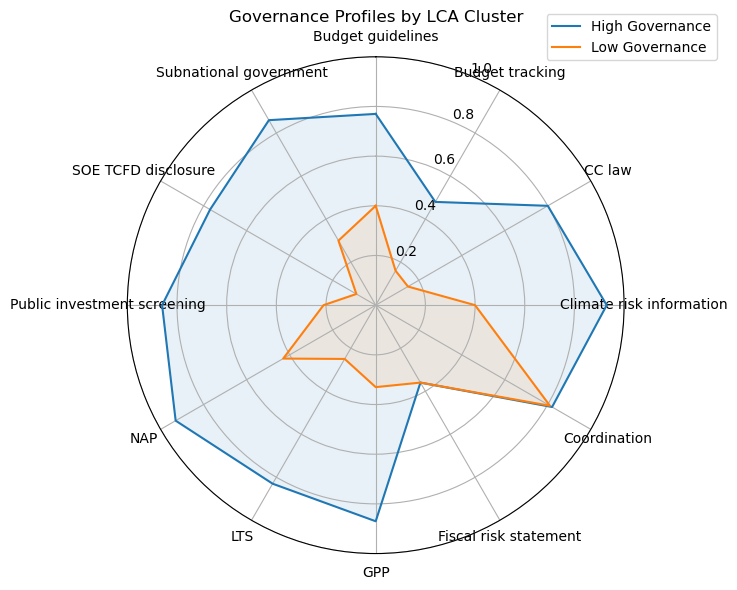

In [55]:
class_profiles = output_profiles.copy()

# Reformat the data
radar_df = class_profiles.drop(columns=['Class 1', 'Class 2', 'Assigned Class'])
categories = list(radar_df.columns)
num_vars = len(categories)

# Convert to angles
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete the loop

# Plot
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
for label, row in radar_df.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=label)
    ax.fill(angles, values, alpha=0.1)

# Formatting
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), categories)
ax.set_ylim(0, 1)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.title('Governance Profiles by LCA Cluster')
plt.tight_layout()
plt.show()


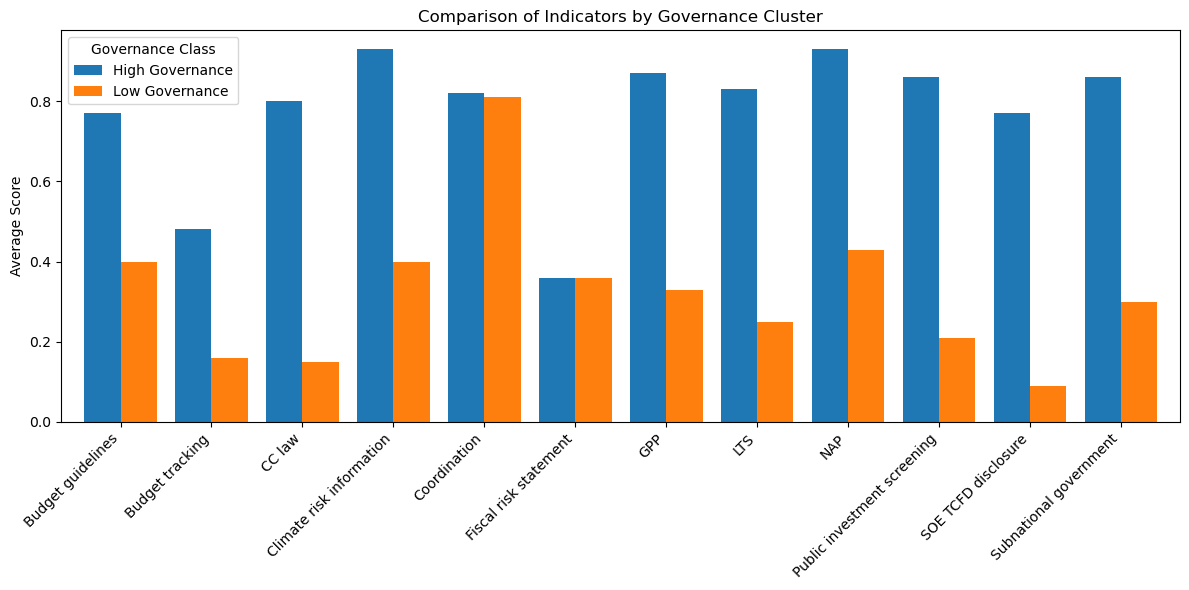

In [56]:
class_profiles_bar = radar_df.T  # transpose for bar plot

class_profiles_bar.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.ylabel("Average Score")
plt.title("Comparison of Indicators by Governance Cluster")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Governance Class")
plt.tight_layout()
plt.show()


In [57]:
output_plot = output.copy()
output_plot = output_plot.reset_index().rename(columns={'index': 'Country'})
governance_color_map = {
    'High Governance': 'green',
    'Low Governance': 'red'
}

import plotly.express as px

fig = px.choropleth(
    output_plot,
    locations="Country",  # must match ISO names
    locationmode="country names",
    color="Assigned Class Label",
    title="LCA-based Governance Clusters",
    color_discrete_map=governance_color_map,
    projection="natural earth"
)

fig.update_layout(
    legend_title_text='Governance Cluster',
    geo=dict(showframe=False, showcoastlines=True)
)

fig.show()



In [ ]:

# # output['Assigned Class'] = assignments + 1
# # output['Assigned Class Label'] = output['Assigned Class'].map({
# #     1: 'High Governance',
# #     2: 'Medium Governance',
# #     3: 'Low Governance',
# #     4: 'Very Low Governance'
# # })
    
# #  Add raw class assignments (0-based)
# output['Assigned Class'] = assignments

# # Map class index to correct labels based on interpretation
# output['Assigned Class Label'] = output['Assigned Class'].map({
#     0: 'Low Governance',
#     1: 'High Governance'
# })
#     # Get response probabilities
#     response_probs = {}
#     for j, indicator in enumerate(data_lca.columns):
#         for c in range(n_classes):
#             for k in [0, 0.5, 1]:
#                 prob = model.get_parameters()['measurement'][j][c][int(k*2)]
#                 response_probs[(indicator, c+1, k)] = prob
    
#     # Save results
#     # output.to_csv('lca_assignments_updated.csv')
#     response_probs_df = pd.DataFrame.from_dict(
#         response_probs, orient='index',
#         columns=['Probability']
#     ).reset_index().rename(columns={'level_0': 'Indicator', 'level_1': 'Class', 'level_2': 'Response'})
#     # response_probs_df.to_csv('lca_response_probs_updated.csv', index=False)
    
#     # print("\nClass Assignments:")
#     print(output[['Assigned Class', 'Assigned Class Label']].head())
#     # print("\nResponse Probabilities saved to 'lca_response_probs_updated.csv'")

# if __name__ == "__main__":
#     main()


Fitting LCA with 2 classes...
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 20/20 [00:00<00:00, 21.01it/s, max_LL=-965, max_avg_LL=-6.65]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical        
          class_no                                      0       1
          param variable                                         
          pis   Budget guidelines_0                0.5998  0.3491
                Budget guidelines_1                0.4002  0.6509
                Budget tracking_0                  0.8801  0.5275
                Budget tracking_1                  0.1199  0.4725
                CC law_0                           0.8492  0.2582
                CC law_1                           0.1508  0.7418
                Climate risk information_0         0.6286  0.0931
                Climate risk information_1         0.3714  0.9069
                Coordination_0                     0.2094  0.2553
                Coordination_1                     0.7906  0.7447
                Fiscal risk statement_0            0.6735  0.6830
                Fiscal risk st

Initializations (n_init) : 100%|██████████| 20/20 [00:00<00:00, 24.75it/s, max_LL=-975, max_avg_LL=-6.73]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical        
          class_no                                      0       1
          param variable                                         
          pis   Budget guidelines_0                0.2478  0.6054
                Budget guidelines_1                0.7522  0.3946
                Budget tracking_0                  0.6315  0.8918
                Budget tracking_1                  0.3685  0.1082
                CC law_0                           0.2565  0.8131
                CC law_1                           0.7435  0.1869
                Climate risk information_0         0.0851  0.6129
                Climate risk information_1         0.9149  0.3871
                Coordination_0                     0.3302  0.2306
                Coordination_1                     0.6698  0.7694
                Fiscal risk statement_0            0.6520  0.6471
                Fiscal risk st

Initializations (n_init) : 100%|██████████| 20/20 [00:00<00:00, 41.29it/s, max_LL=-964, max_avg_LL=-6.61]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical        
          class_no                                      0       1
          param variable                                         
          pis   Budget guidelines_0                0.2606  0.6226
                Budget guidelines_1                0.7394  0.3774
                Budget tracking_0                  0.5768  0.8816
                Budget tracking_1                  0.4232  0.1184
                CC law_0                           0.1318  0.8267
                CC law_1                           0.8682  0.1733
                Climate risk information_0         0.0464  0.6712
                Climate risk information_1         0.9536  0.3288
                Coordination_0                     0.3572  0.2071
                Coordination_1                     0.6428  0.7929
                Fiscal risk statement_0            0.6203  0.6894
                Fiscal risk st

Initializations (n_init) : 100%|██████████| 20/20 [00:00<00:00, 39.75it/s, max_LL=-969, max_avg_LL=-6.64]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical        
          class_no                                      0       1
          param variable                                         
          pis   Budget guidelines_0                0.1852  0.5869
                Budget guidelines_1                0.8148  0.4131
                Budget tracking_0                  0.5648  0.9065
                Budget tracking_1                  0.4352  0.0935
                CC law_0                           0.2183  0.8553
                CC law_1                           0.7817  0.1447
                Climate risk information_0         0.1389  0.6038
                Climate risk information_1         0.8611  0.3962
                Coordination_0                     0.2647  0.2493
                Coordination_1                     0.7353  0.7507
                Fiscal risk statement_0            0.6717  0.6898
                Fiscal risk st

Initializations (n_init) : 100%|██████████| 20/20 [00:00<00:00, 34.49it/s, max_LL=-993, max_avg_LL=-6.8]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical        
          class_no                                      0       1
          param variable                                         
          pis   Budget guidelines_0                0.2905  0.5714
                Budget guidelines_1                0.7095  0.4286
                Budget tracking_0                  0.5444  0.8627
                Budget tracking_1                  0.4556  0.1373
                CC law_0                           0.2555  0.8699
                CC law_1                           0.7445  0.1301
                Climate risk information_0         0.1126  0.6592
                Climate risk information_1         0.8874  0.3408
                Coordination_0                     0.2745  0.2168
                Coordination_1                     0.7255  0.7832
                Fiscal risk statement_0            0.6485  0.6420
                Fiscal risk st

Initializations (n_init) : 100%|██████████| 20/20 [00:00<00:00, 37.46it/s, max_LL=-1.22e+3, max_avg_LL=-6.7]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical        
          class_no                                      0       1
          param variable                                         
          pis   Budget guidelines_0                0.5975  0.2664
                Budget guidelines_1                0.4025  0.7336
                Budget tracking_0                  0.8846  0.5693
                Budget tracking_1                  0.1154  0.4307
                CC law_0                           0.8434  0.2231
                CC law_1                           0.1566  0.7769
                Climate risk information_0         0.6356  0.0957
                Climate risk information_1         0.3644  0.9043
                Coordination_0                     0.2226  0.2959
                Coordination_1                     0.7774  0.7041
                Fiscal risk statement_0            0.6677  0.6568
                Fiscal risk st

Initializations (n_init) : 100%|██████████| 20/20 [00:01<00:00, 17.28it/s, max_LL=-942, max_avg_LL=-6.49]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical                
          class_no                                      0       1       2
          param variable                                                 
          pis   Budget guidelines_0                0.8018  0.3526  0.0960
                Budget guidelines_1                0.1982  0.6474  0.9040
                Budget tracking_0                  0.9599  0.5378  0.6479
                Budget tracking_1                  0.0401  0.4622  0.3521
                CC law_0                           0.8492  0.2538  0.7968
                CC law_1                           0.1508  0.7462  0.2032
                Climate risk information_0         0.6070  0.0424  0.6774
                Climate risk information_1         0.3930  0.9576  0.3226
                Coordination_0                     0.2420  0.2738  0.1188
                Coordination_1                     0.7580  0.7262 

Initializations (n_init) : 100%|██████████| 20/20 [00:01<00:00, 12.81it/s, max_LL=-956, max_avg_LL=-6.59]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical                
          class_no                                      0       1       2
          param variable                                                 
          pis   Budget guidelines_0                0.7563  0.0909  0.2465
                Budget guidelines_1                0.2437  0.9091  0.7535
                Budget tracking_0                  0.9592  0.6382  0.6472
                Budget tracking_1                  0.0408  0.3618  0.3528
                CC law_0                           0.8356  0.7376  0.2557
                CC law_1                           0.1644  0.2624  0.7443
                Climate risk information_0         0.6168  0.5879  0.0934
                Climate risk information_1         0.3832  0.4121  0.9066
                Coordination_0                     0.2557  0.1291  0.3409
                Coordination_1                     0.7443  0.8709 

Initializations (n_init) : 100%|██████████| 20/20 [00:01<00:00, 19.35it/s, max_LL=-937, max_avg_LL=-6.41]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical                
          class_no                                      0       1       2
          param variable                                                 
          pis   Budget guidelines_0                0.8275  0.2799  0.2161
                Budget guidelines_1                0.1725  0.7201  0.7839
                Budget tracking_0                  1.0000  0.5919  0.6340
                Budget tracking_1                  0.0000  0.4081  0.3660
                CC law_0                           0.8406  0.1332  0.7355
                CC law_1                           0.1594  0.8668  0.2645
                Climate risk information_0         0.7165  0.0000  0.5728
                Climate risk information_1         0.2835  1.0000  0.4272
                Coordination_0                     0.3147  0.3976  0.0000
                Coordination_1                     0.6853  0.6024 

Initializations (n_init) : 100%|██████████| 20/20 [00:01<00:00, 15.56it/s, max_LL=-949, max_avg_LL=-6.5]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical                
          class_no                                      0       1       2
          param variable                                                 
          pis   Budget guidelines_0                0.7244  0.0774  0.1966
                Budget guidelines_1                0.2756  0.9226  0.8034
                Budget tracking_0                  0.9649  0.6360  0.5900
                Budget tracking_1                  0.0351  0.3640  0.4100
                CC law_0                           0.8722  0.6893  0.2255
                CC law_1                           0.1278  0.3107  0.7745
                Climate risk information_0         0.5976  0.5991  0.0985
                Climate risk information_1         0.4024  0.4009  0.9015
                Coordination_0                     0.2805  0.1155  0.2950
                Coordination_1                     0.7195  0.8845 

Initializations (n_init) : 100%|██████████| 20/20 [00:01<00:00, 18.36it/s, max_LL=-970, max_avg_LL=-6.64]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical                
          class_no                                      0       1       2
          param variable                                                 
          pis   Budget guidelines_0                0.3385  0.2778  0.6026
                Budget guidelines_1                0.6615  0.7222  0.3974
                Budget tracking_0                  0.4396  0.5323  0.9380
                Budget tracking_1                  0.5604  0.4677  0.0620
                CC law_0                           0.3438  0.2734  0.9274
                CC law_1                           0.6562  0.7266  0.0726
                Climate risk information_0         0.3897  0.0368  0.6892
                Climate risk information_1         0.6103  0.9632  0.3108
                Coordination_0                     0.0000  0.3624  0.2506
                Coordination_1                     1.0000  0.6376 

Initializations (n_init) : 100%|██████████| 20/20 [00:01<00:00, 11.08it/s, max_LL=-1.19e+3, max_avg_LL=-6.57]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical                
          class_no                                      0       1       2
          param variable                                                 
          pis   Budget guidelines_0                0.1077  0.2719  0.7834
                Budget guidelines_1                0.8923  0.7281  0.2166
                Budget tracking_0                  0.6507  0.5804  0.9657
                Budget tracking_1                  0.3493  0.4196  0.0343
                CC law_0                           0.7570  0.2272  0.8612
                CC law_1                           0.2430  0.7728  0.1388
                Climate risk information_0         0.6429  0.0702  0.6314
                Climate risk information_1         0.3571  0.9298  0.3686
                Coordination_0                     0.0901  0.3126  0.2698
                Coordination_1                     0.9099  0.6874 

Initializations (n_init) : 100%|██████████| 20/20 [00:01<00:00, 13.88it/s, max_LL=-922, max_avg_LL=-6.36]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical                        
          class_no                                      0       1       2       3
          param variable                                                         
          pis   Budget guidelines_0                0.0034  0.2204  0.6740  0.7986
                Budget guidelines_1                0.9966  0.7796  0.3260  0.2014
                Budget tracking_0                  0.6256  0.3855  0.8578  0.9559
                Budget tracking_1                  0.3744  0.6145  0.1422  0.0441
                CC law_0                           0.7970  0.1052  0.6350  0.8795
                CC law_1                           0.2030  0.8948  0.3650  0.1205
                Climate risk information_0         0.7141  0.0000  0.3145  0.6479
                Climate risk information_1         0.2859  1.0000  0.6855  0.3521
                Coordination_0                     0

Initializations (n_init) : 100%|██████████| 20/20 [00:01<00:00, 10.32it/s, max_LL=-936, max_avg_LL=-6.45]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical                        
          class_no                                      0       1       2       3
          param variable                                                         
          pis   Budget guidelines_0                0.6362  0.1769  0.7763  0.0000
                Budget guidelines_1                0.3638  0.8231  0.2237  1.0000
                Budget tracking_0                  0.8783  0.5579  0.9608  0.6870
                Budget tracking_1                  0.1217  0.4421  0.0392  0.3130
                CC law_0                           0.6632  0.1605  0.8531  0.8067
                CC law_1                           0.3368  0.8395  0.1469  0.1933
                Climate risk information_0         0.3720  0.0000  0.6947  0.6558
                Climate risk information_1         0.6280  1.0000  0.3053  0.3442
                Coordination_0                     0

Initializations (n_init) : 100%|██████████| 20/20 [00:01<00:00, 12.63it/s, max_LL=-921, max_avg_LL=-6.31]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical                        
          class_no                                      0       1       2       3
          param variable                                                         
          pis   Budget guidelines_0                0.9149  0.1848  0.2279  0.8016
                Budget guidelines_1                0.0851  0.8152  0.7721  0.1984
                Budget tracking_0                  0.9202  0.6259  0.5672  0.9998
                Budget tracking_1                  0.0798  0.3741  0.4328  0.0002
                CC law_0                           0.7784  0.7155  0.0955  0.8529
                CC law_1                           0.2216  0.2845  0.9045  0.1471
                Climate risk information_0         0.5893  0.5735  0.0000  0.7086
                Climate risk information_1         0.4107  0.4265  1.0000  0.2914
                Coordination_0                     0

Initializations (n_init) : 100%|██████████| 20/20 [00:01<00:00, 11.03it/s, max_LL=-935, max_avg_LL=-6.41]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical                        
          class_no                                      0       1       2       3
          param variable                                                         
          pis   Budget guidelines_0                0.5989  0.0838  0.1213  0.7138
                Budget guidelines_1                0.4011  0.9162  0.8787  0.2862
                Budget tracking_0                  0.9514  0.4662  0.3902  1.0000
                Budget tracking_1                  0.0486  0.5338  0.6098  0.0000
                CC law_0                           0.9143  0.1499  0.3236  0.6299
                CC law_1                           0.0857  0.8501  0.6764  0.3701
                Climate risk information_0         0.7254  0.0480  0.4079  0.0026
                Climate risk information_1         0.2746  0.9520  0.5921  0.9974
                Coordination_0                     0

Initializations (n_init) : 100%|██████████| 20/20 [00:01<00:00, 17.14it/s, max_LL=-948, max_avg_LL=-6.49]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical                        
          class_no                                      0       1       2       3
          param variable                                                         
          pis   Budget guidelines_0                0.2083  0.8526  0.5609  0.1654
                Budget guidelines_1                0.7917  0.1474  0.4391  0.8346
                Budget tracking_0                  0.3347  0.9484  0.9348  0.4309
                Budget tracking_1                  0.6653  0.0516  0.0652  0.5691
                CC law_0                           0.3389  0.6924  0.9553  0.1503
                CC law_1                           0.6611  0.3076  0.0447  0.8497
                Climate risk information_0         0.4548  0.4180  0.7015  0.0000
                Climate risk information_1         0.5452  0.5820  0.2985  1.0000
                Coordination_0                     0

Initializations (n_init) : 100%|██████████| 20/20 [00:01<00:00, 15.35it/s, max_LL=-1.18e+3, max_avg_LL=-6.46]


MODEL REPORT
    Measurement model parameters
          model_name                          categorical                        
          class_no                                      0       1       2       3
          param variable                                                         
          pis   Budget guidelines_0                0.1593  0.0005  0.5728  0.7794
                Budget guidelines_1                0.8407  0.9995  0.4272  0.2206
                Budget tracking_0                  0.4179  0.6486  0.8291  0.9640
                Budget tracking_1                  0.5821  0.3514  0.1709  0.0360
                CC law_0                           0.0607  0.8130  0.5813  0.8820
                CC law_1                           0.9393  0.1870  0.4187  0.1180
                Climate risk information_0         0.0000  0.6926  0.3010  0.6866
                Climate risk information_1         1.0000  0.3074  0.6990  0.3134
                Coordination_0                     0

KeyError: 0

In [55]:
response_probs_df 

NameError: name 'response_probs_df' is not defined